In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import os.path as osp
import yaml
import seml
from collections import defaultdict

In [8]:
collection_name = 'week3_spectral_norm_vs_accuracy_less_inits_uniform_splitting'
collection = seml.database.get_collection(collection_name)
results = [{'config' : r['config'], 'result' : r['result'], 'id' : r['_id']} for r in collection.find() if r['status'] in ('COMPLETED',)]

In [9]:
# Reorder results to access them like [dataset]
runs = defaultdict(list)
for result in results:
    config = result['config']
    runs[config['data']['dataset']].append(result)

In [10]:
norm_vs_acc = defaultdict(list)
for dataset, run_list in runs.items():
    for run in run_list:
        config = run['config']
        norm_vs_acc[config['data']['dataset']].append((
            config['model']['weight_scale'],
            run['result']['val_accuracy_mean']['value']))

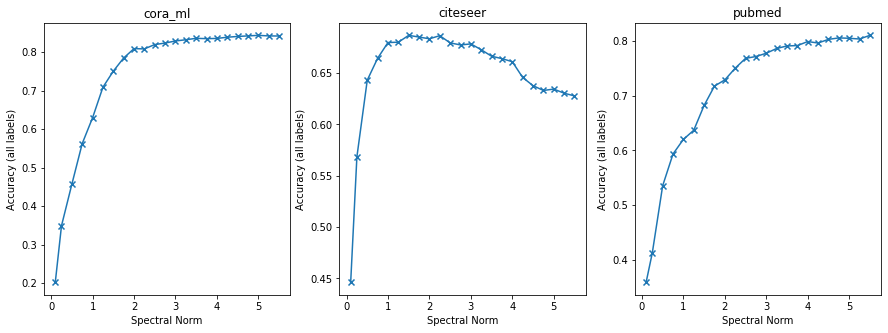

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
for idx, name in enumerate(('cora_ml', 'citeseer', 'pubmed')):
    axs[idx].plot(*np.array(norm_vs_acc[name]).T)
    axs[idx].scatter(*np.array(norm_vs_acc[name]).T, marker='x')
    axs[idx].set_title(name)
    axs[idx].set_xlabel('Spectral Norm')
    axs[idx].set_ylabel('Accuracy (all labels)')